# Heart-Disease-Prediction

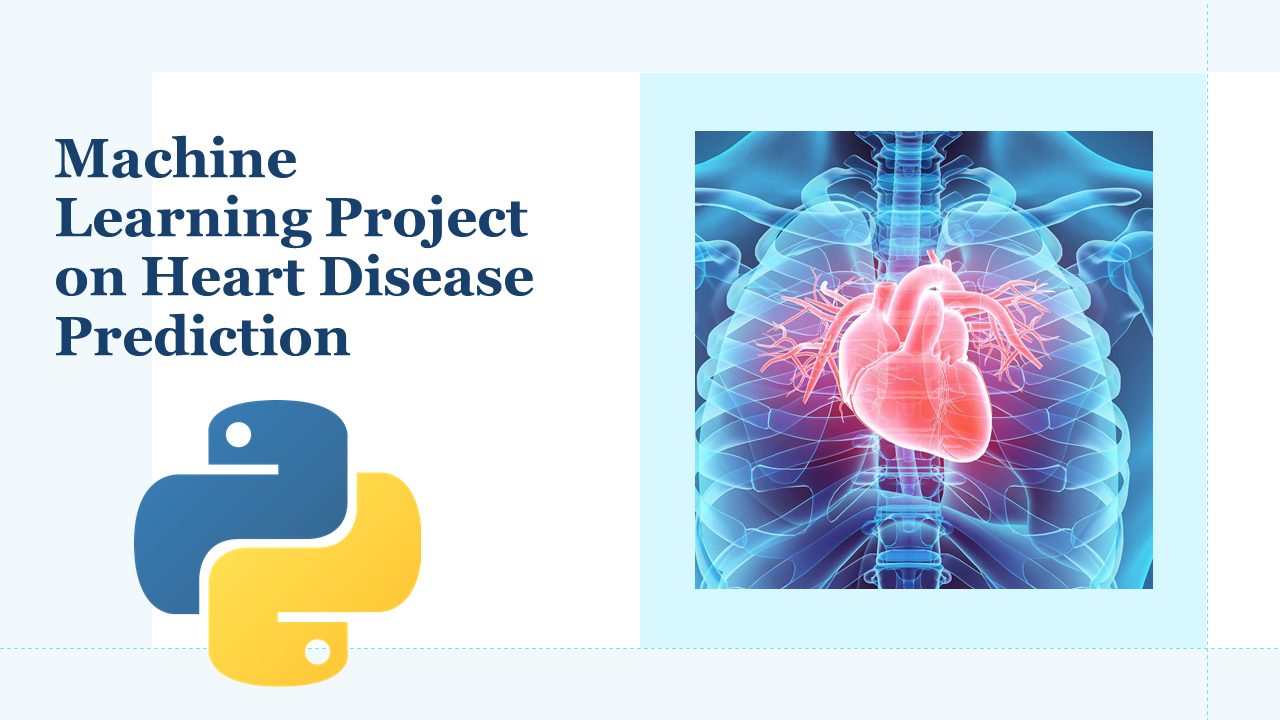

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv("Dataset/heart.csv")

**Content
Attribute Information:**

* age
* sex
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target = 1 : Heart Disease Chance

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Basic Information of Dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.shape

(1025, 14)

In [9]:
df.size

14350

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Check for Null Values and Duplicated Values**

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.duplicated().sum()

723

In [5]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

# Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

**PairPLot**

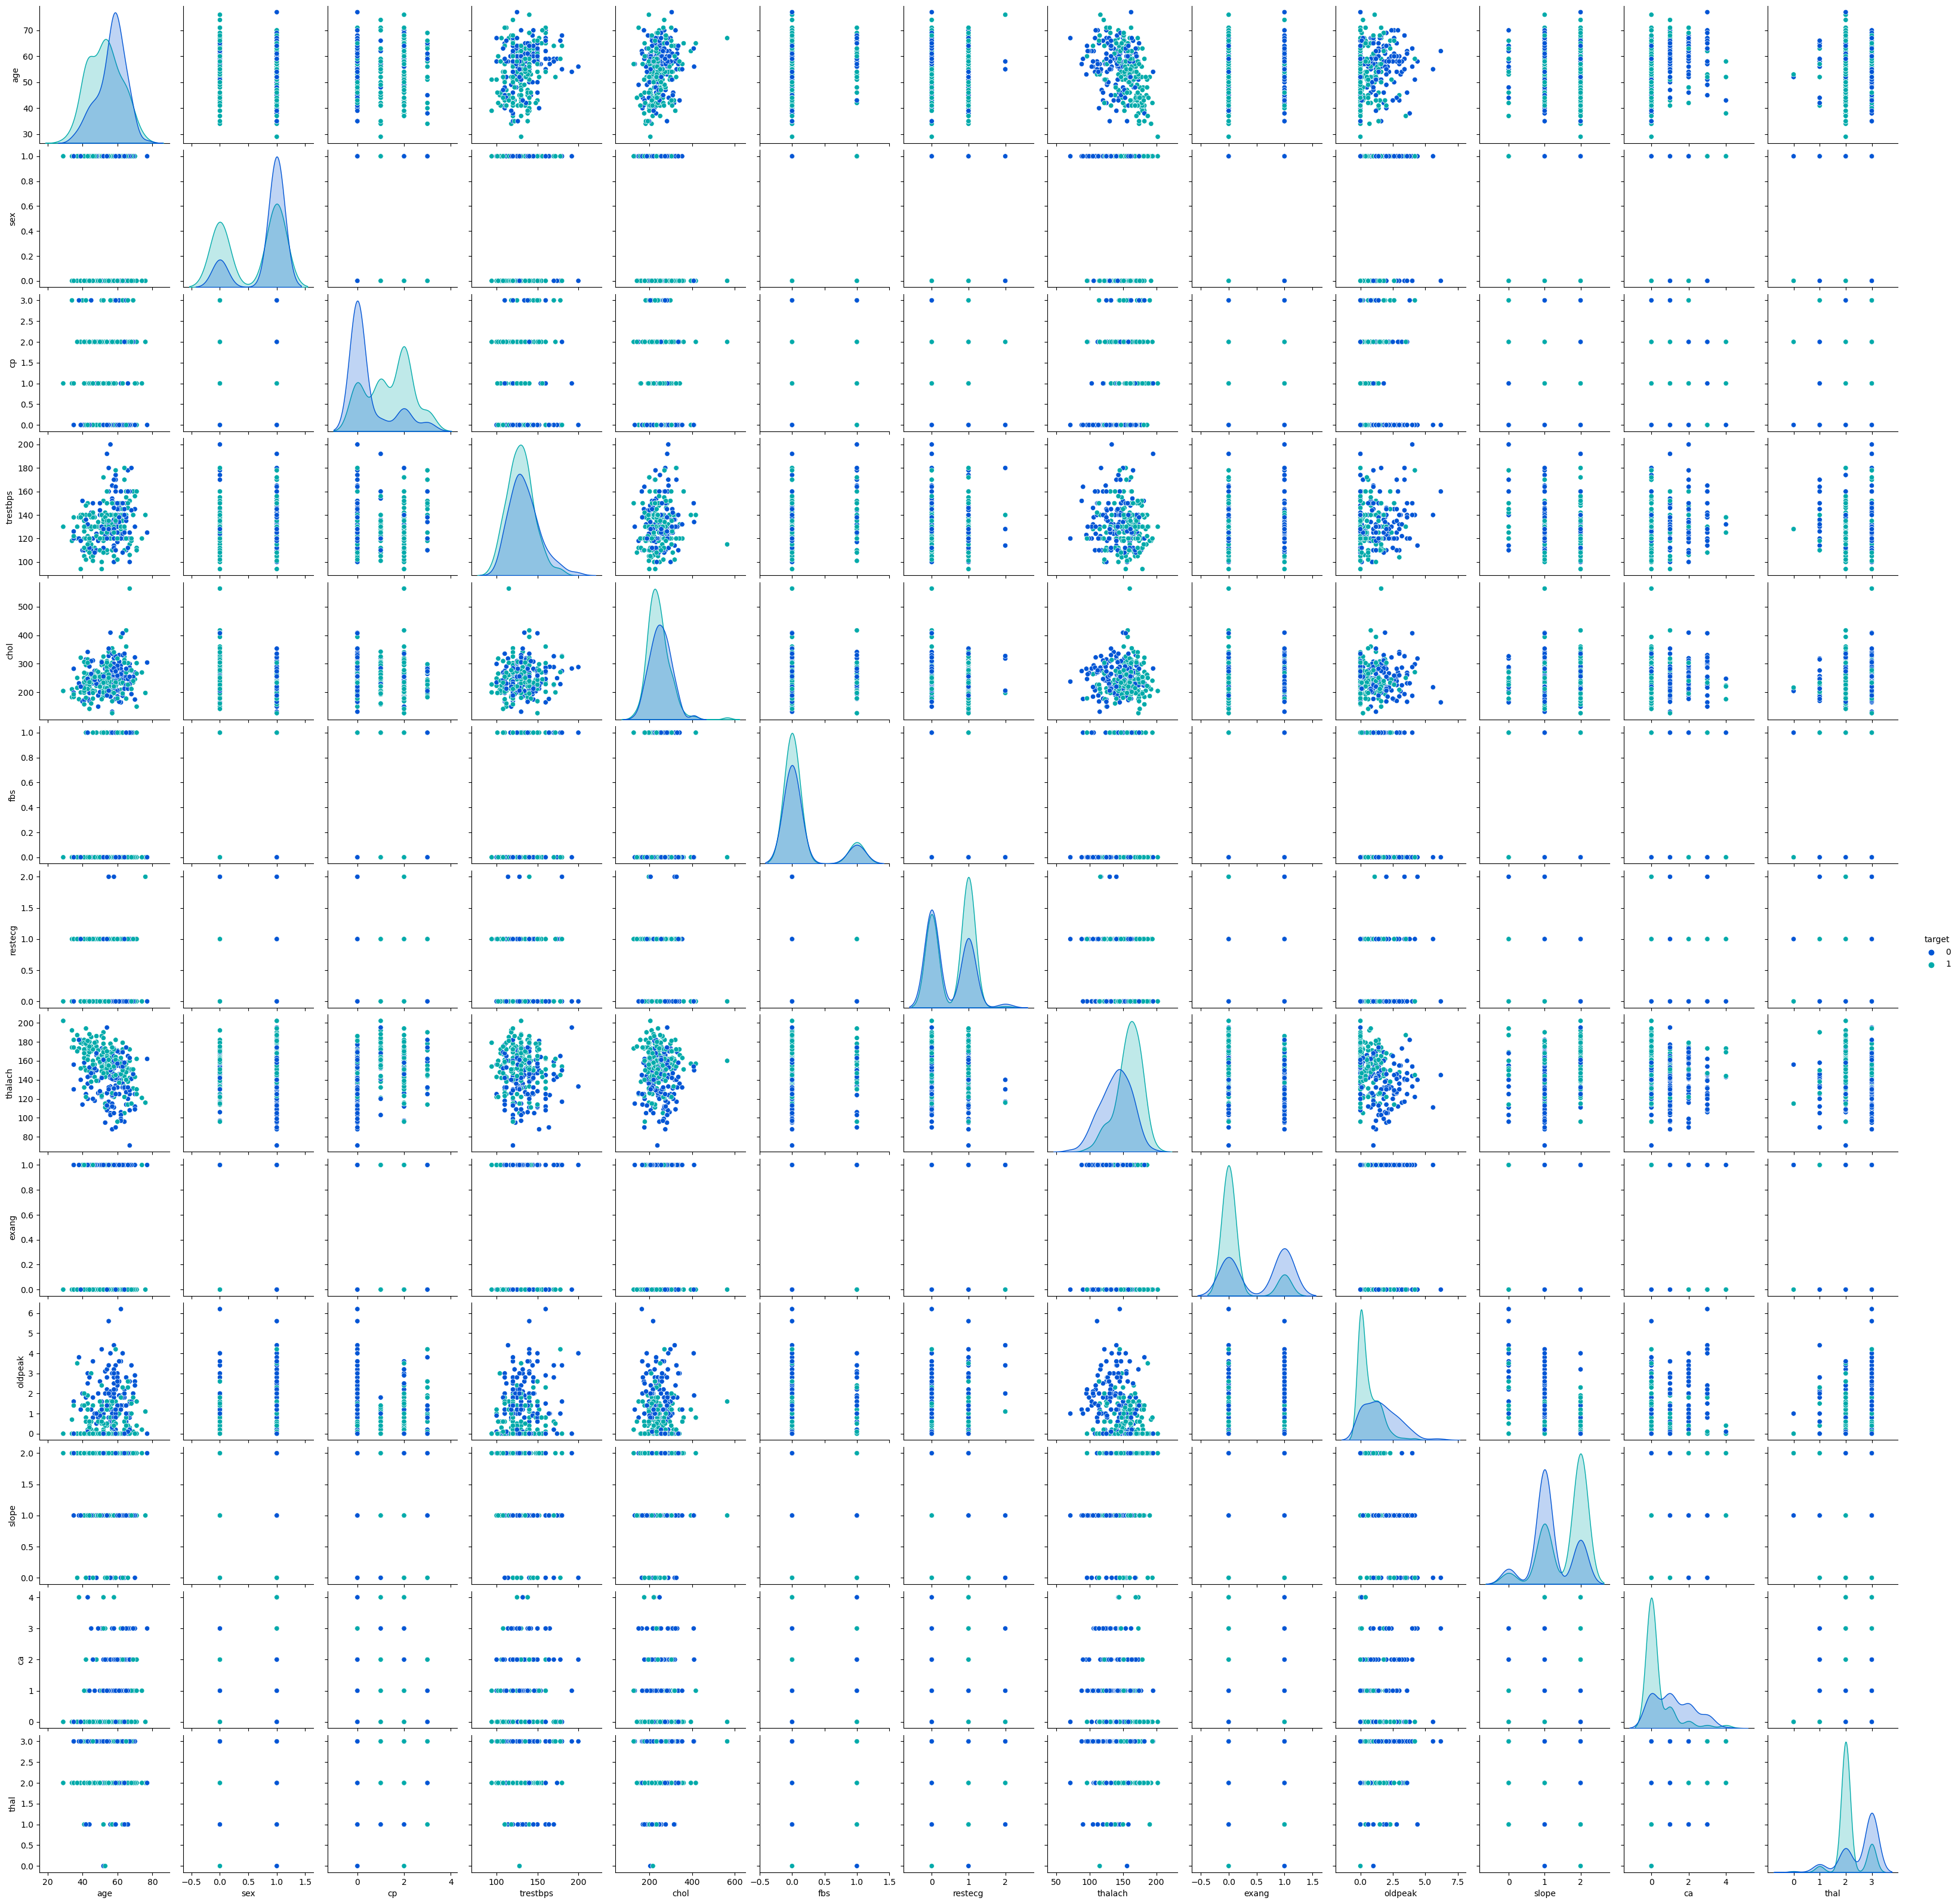

In [19]:
sns.pairplot(df, hue = 'target', palette= 'winter')

**HeatMap**

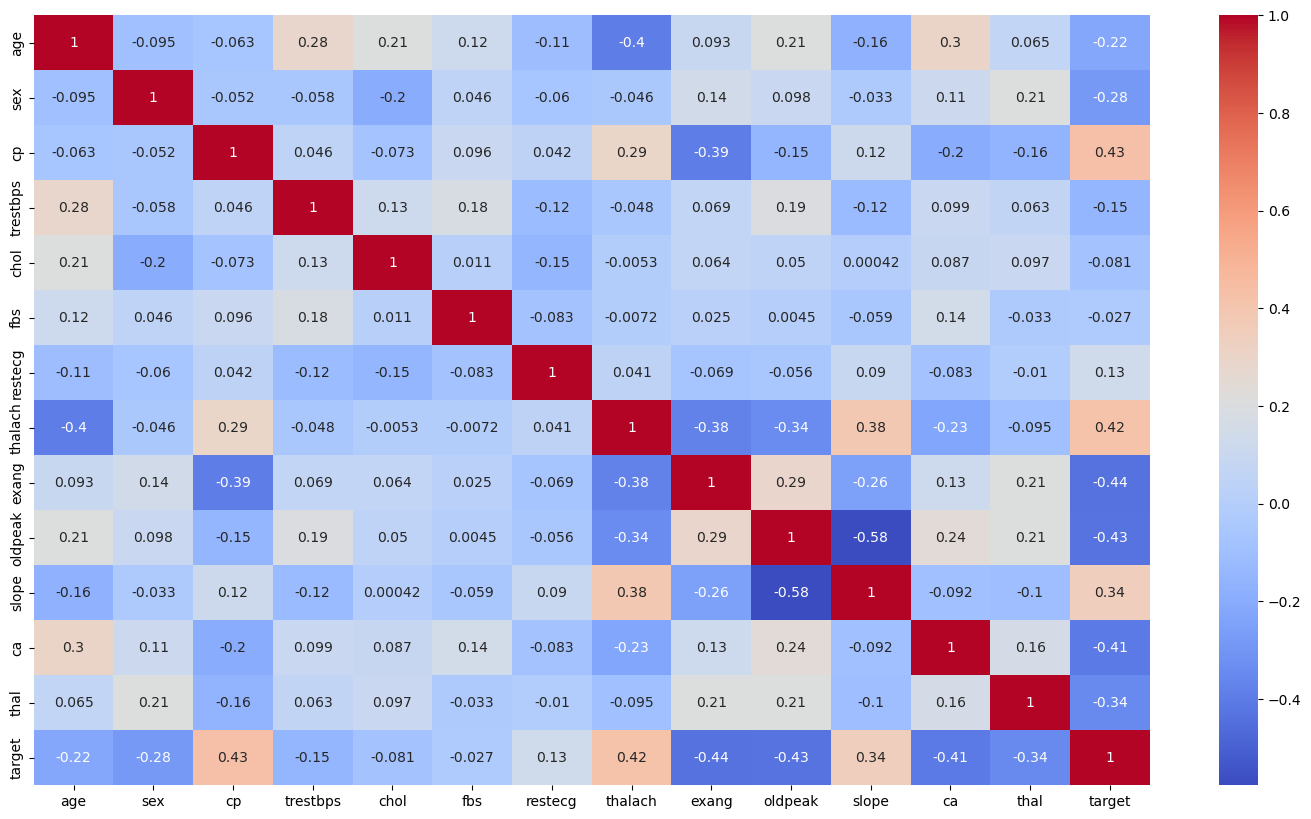

In [17]:
pt.figure(figsize=(18,10))
sb.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
pt.show()

**Histogram**

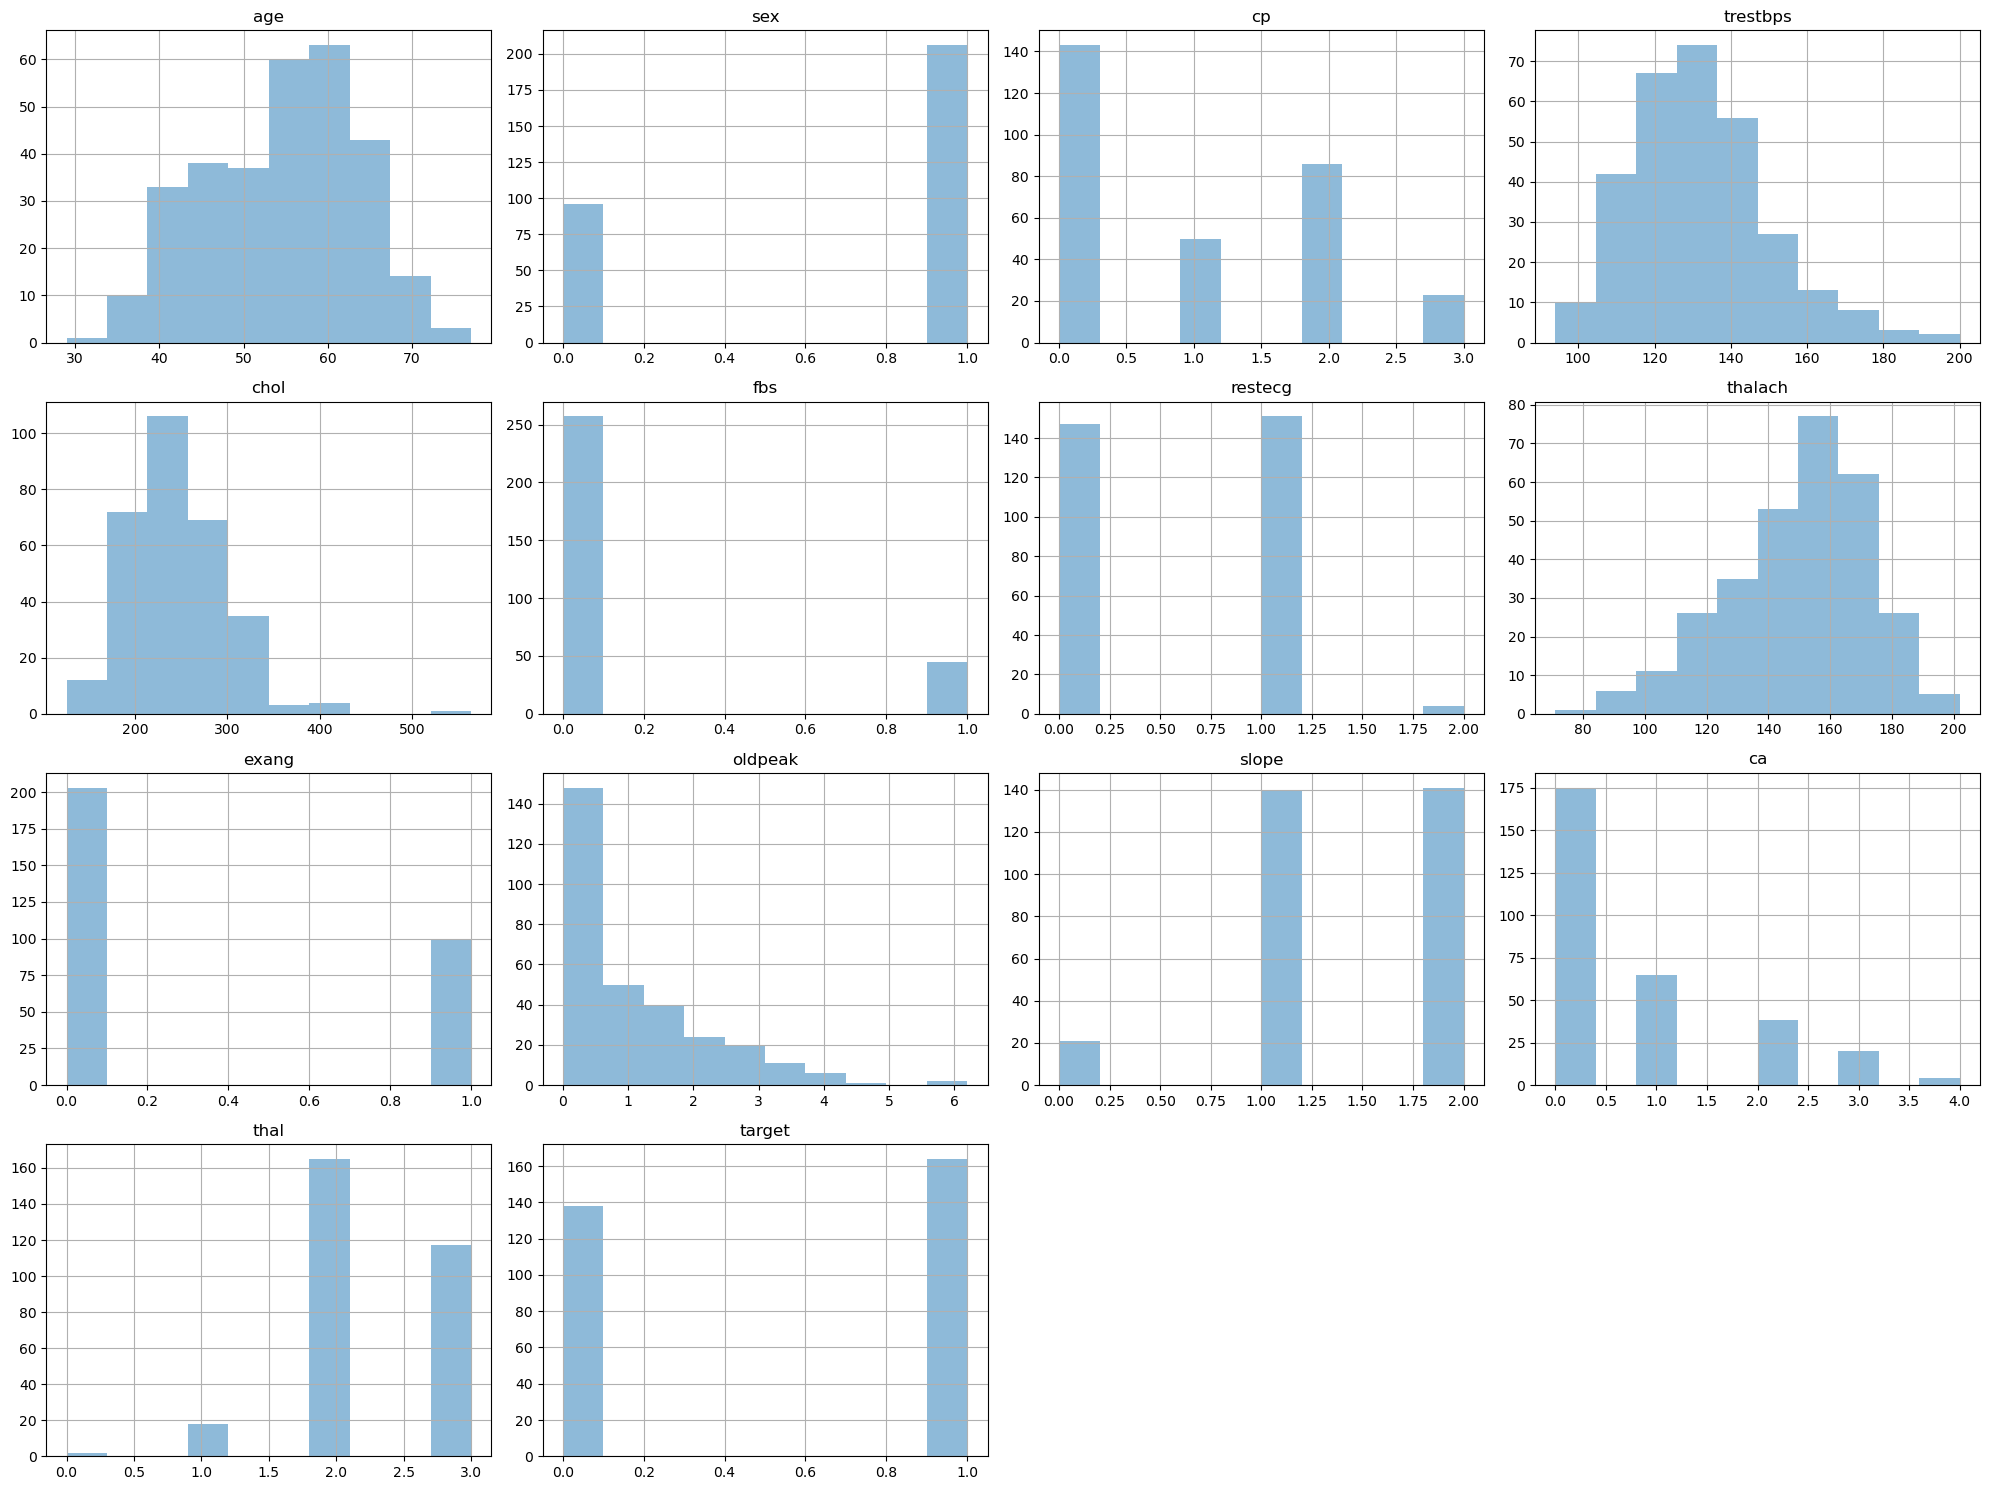

In [18]:
import matplotlib.pyplot as plt
df.hist(alpha=0.5, figsize=(20, 15))
plt.tight_layout()
plt.show()

**ScatterPlot**

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='thalach', ylabel='cp'>

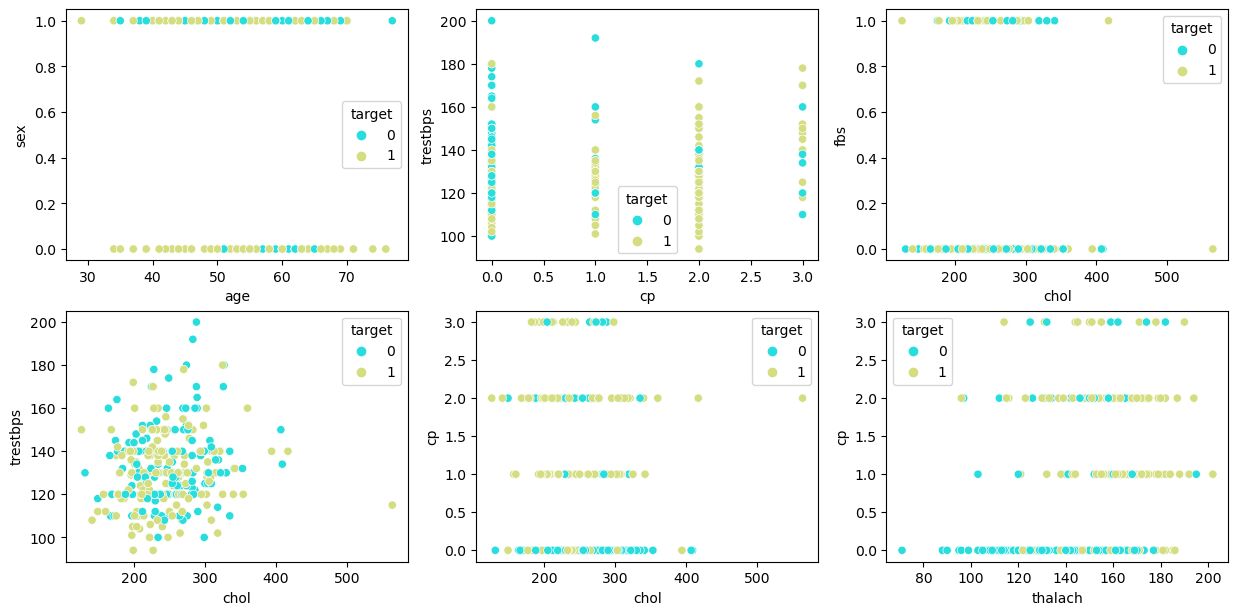

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
# plotting a scatterplot using seaborn 
sns.scatterplot(data=df, x='age', 
                y='sex', hue='target', palette='rainbow') 
plt.subplot(4,3,2)
sns.scatterplot(data=df, x='cp', 
                y='trestbps', hue='target', palette='rainbow') 
plt.subplot(4,3,3)
sns.scatterplot(data=df, x='chol', 
                y='fbs', hue='target', palette='rainbow') 
plt.subplot(4,3,4)
sns.scatterplot(data=df, x='chol', 
                y='trestbps', hue='target', palette='rainbow')
plt.subplot(4,3,5)
sns.scatterplot(data=df, x='chol', 
                y='cp', hue='target', palette='rainbow') 
plt.subplot(4,3,6)
sns.scatterplot(data=df, x='thalach', 
                y='cp', hue='target', palette='rainbow') 


**BarPlot**

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='target', ylabel='thal'>

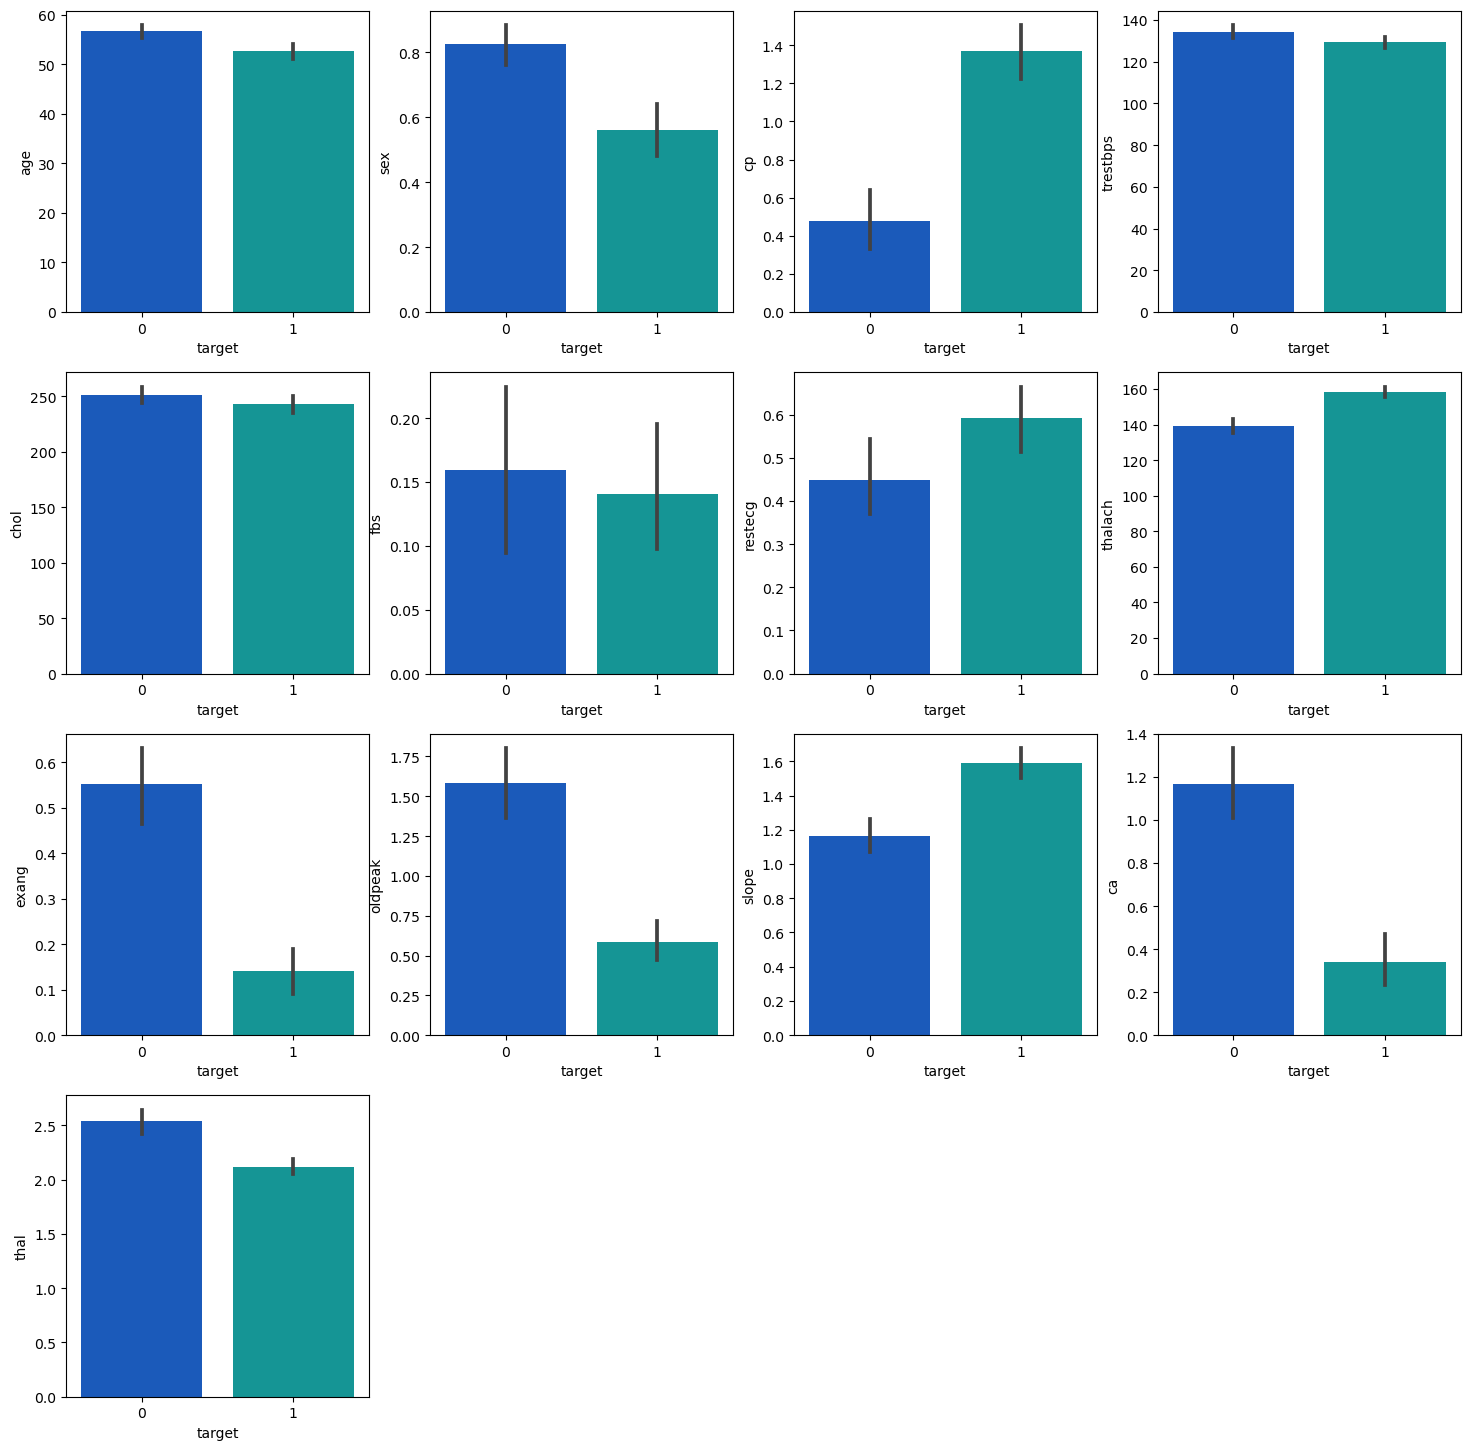

In [30]:
#Analysis of 'quality' with respect  to other features 

plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
sns.barplot(x ='target', y='age', data = df,palette = "winter")
plt.subplot(4,4,2)
sns.barplot(x ='target', y='sex', data = df,palette = "winter")
plt.subplot(4,4,3)
sns.barplot(x ='target', y='cp', data = df,palette = "winter")
plt.subplot(4,4,4)
sns.barplot(x ='target', y='trestbps', data = df,palette = "winter")
plt.subplot(4,4,5)
sns.barplot(x ='target', y='chol', data = df,palette = "winter")
plt.subplot(4,4,6)
sns.barplot(x ='target', y='fbs', data = df,palette = "winter")
plt.subplot(4,4,7)
sns.barplot(x ='target', y='restecg', data = df,palette = "winter")
plt.subplot(4,4,8)
sns.barplot(x ='target', y='thalach', data =df,palette = "winter")
plt.subplot(4,4,9)
sns.barplot(x ='target', y='exang', data = df,palette = "winter")
plt.subplot(4,4,10)
sns.barplot(x ='target', y='oldpeak', data = df,palette = "winter")
plt.subplot(4,4,11)
sns.barplot(x ='target', y='slope', data = df,palette = "winter")
plt.subplot(4,4,12)
sns.barplot(x ='target', y='ca', data = df,palette = "winter")
plt.subplot(4,4,13)
sns.barplot(x ='target', y='thal', data = df,palette = "winter")

# Model Training

In [6]:
from sklearn.model_selection import train_test_split

**Splitting the dataset into training data and test data**

In [7]:
# Separate feature column and target column
X = df.drop(['target'], axis = 1)
Y = df['target']

In [8]:
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 40)

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression()

In [11]:
model.fit(x_train,y_train)

LogisticRegression()

**Metrics**

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
y_pred = model.predict(x_test)

In [14]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 90.1639344262295


In [15]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)
print(classification_report(y_test,y_pred))

[[30  4]
 [ 2 25]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.86      0.93      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**Confusion Matrix**

<Axes: >

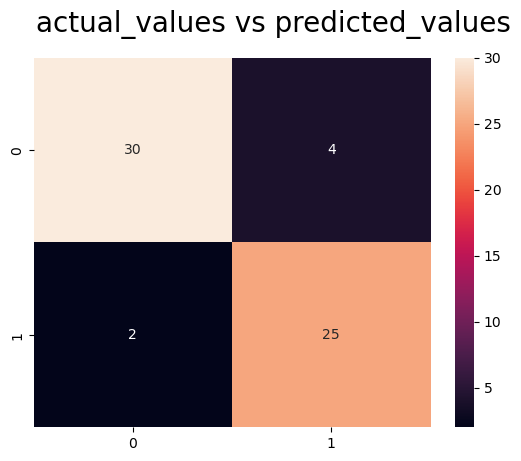

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure()
fig.suptitle('actual_values vs predicted_values', fontsize=20) 
sns.heatmap(confusion_mat, annot=True)

# RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier()

**Metrics**

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 90.1639344262295


In [22]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)
print(classification_report(y_test,y_pred))

[[30  4]
 [ 2 25]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        34
           1       0.86      0.93      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**Confusion Matrix**

<Axes: >

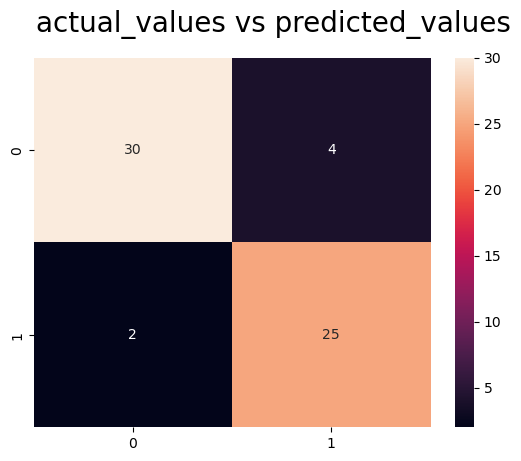

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure()
fig.suptitle('actual_values vs predicted_values', fontsize=20) 
sns.heatmap(confusion_mat, annot=True)

# Save the Model

In [30]:
import pickle

In [31]:
filename = 'heart_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


# Test the Model

In [33]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [34]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2
361,62,1,2,130,231,0,1,146,0,1.8,1,3,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [35]:
load_model = pickle.load(open(filename, 'rb'))

**Predict Heart Disease**

**('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal')**

In [37]:
load_model.predict([[58, 0, 0, 100, 248, 0, 0, 122, 0, 1.0, 1, 0, 2]])

array([1], dtype=int64)

In [38]:
ans = load_model.predict([[58, 0, 0, 100, 248, 0, 0, 122, 0, 1.0, 1, 0, 2]])
if(ans==1):
    print("Heart disease detected. Consult doctor immediately.")
else:
    print("There is no chance of heart disease. But you can consult a doctor if you want.")

Heart disease detected. Consult doctor immediately.
